In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

train  = pd.read_csv('impeachment_tweets.csv')
test = pd.read_csv('impeachment_tweets.csv')

train['tidy_tweet'] = np.vectorize(remove_pattern)(train['text'], "@[\w]*")
# train['tidy_tweet'] = np.vectorize(remove_pattern)(train['text'], 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')


In [4]:
train.head()

,id,created_at,author,likes,followers_count,place,search_term,text,tidy_tweet
0,1.223033e+18,2020-01-30 23:59:41,1.195376e+18,0,2,NaN,#Impeachment,Adam Schiff addressing the Senate. #impeachmen...,Adam Schiff addressing the Senate. #impeachmen...
1,1.223033e+18,2020-01-30 23:59:34,8.261545e+17,0,135,NaN,#Impeachment,#Impeachment\nProfessor cited by Dershowitz: D...,#Impeachment\nProfessor cited by Dershowitz: D...
2,1.223033e+18,2020-01-30 23:59:23,1.158096e+07,2,19368,NaN,#Impeachment,#Trump supporters seem to think that Hillary C...,#Trump supporters seem to think that Hillary C...
3,1.223033e+18,2020-01-30 23:59:18,1.911874e+09,0,348,NaN,#Impeachment,@drwear @paulsperry_ @realDonaldTrump It's evi...,"It's evidence of motive. Remember, the whis..."
4,1.223033e+18,2020-01-30 23:59:00,9.960836e+17,0,49,NaN,#Impeachment,@SenMikeLee im hoping the #impeachment for the...,im hoping the #impeachment for the next #demo...


In [5]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train.head()

,id,created_at,author,likes,followers_count,place,search_term,text,tidy_tweet
0,1.223033e+18,2020-01-30 23:59:41,1.195376e+18,0,2,NaN,#Impeachment,Adam Schiff addressing the Senate. #impeachmen...,Adam Schiff addressing Senate #impeachment htt...
1,1.223033e+18,2020-01-30 23:59:34,8.261545e+17,0,135,NaN,#Impeachment,#Impeachment\nProfessor cited by Dershowitz: D...,#Impeachment Professor cited Dershowitz Dersho...
2,1.223033e+18,2020-01-30 23:59:23,1.158096e+07,2,19368,NaN,#Impeachment,#Trump supporters seem to think that Hillary C...,#Trump supporters seem think that Hillary Clin...
3,1.223033e+18,2020-01-30 23:59:18,1.911874e+09,0,348,NaN,#Impeachment,@drwear @paulsperry_ @realDonaldTrump It's evi...,evidence motive Remember whistleblowers lawyer...
4,1.223033e+18,2020-01-30 23:59:00,9.960836e+17,0,49,NaN,#Impeachment,@SenMikeLee im hoping the #impeachment for the...,hoping #impeachment next #democrat president b...


                            Hashtag  Count
0                              Adam    441
1                            Schiff    969
2                        addressing     39
3                            Senate   2330
4                      #impeachment  25845
5                             https  25670
6                             iUdZG      1
7                      #Impeachment   9204
8                         Professor     53
9                             cited     23
10                       Dershowitz    789
11                            wrong    620
12                             qghb      1
13                            TPRlf      1
14                           #Trump   5296
15                       supporters    216
16                             seem    255
17                            think   1693
18                             that  11476
19                          Hillary    225
20                          Clinton    495
21                        President   2383
22         

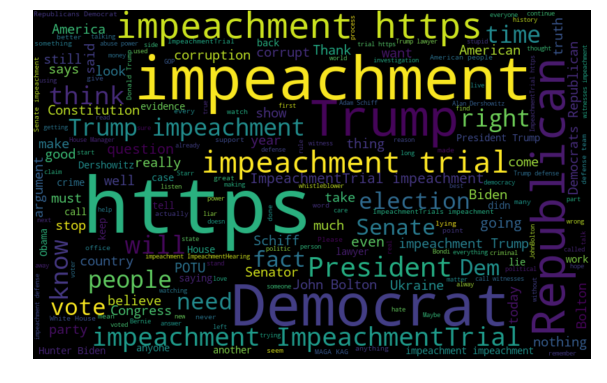

In [6]:
all_words = ' '.join([text for text in train['tidy_tweet']])
list_words = all_words.split()
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
x = nltk.FreqDist(list_words)
dd = pd.DataFrame({'Hashtag': list(x.keys()),
                  'Count': list(x.values())})
print(dd)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [7]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


ht = hashtag_extract(train['tidy_tweet'])

In [8]:
ht = sum(ht,[])

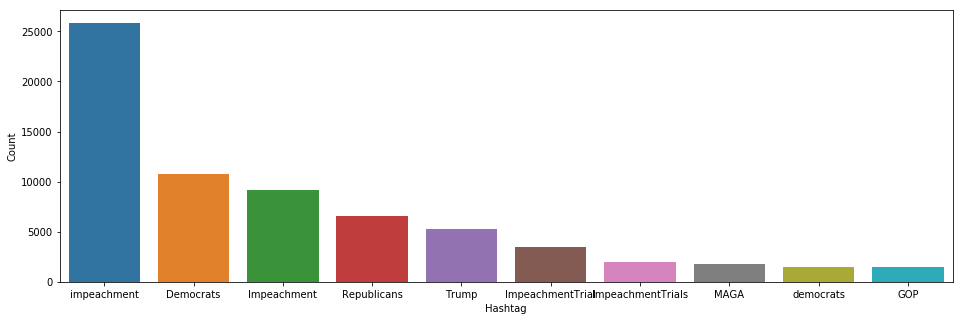

In [9]:
a = nltk.FreqDist(ht)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [10]:
text_file = open("positive-words.txt", "r")
pos_words = text_file.readlines()
for k in range(0,len(pos_words)):
    pos_words[k] = pos_words[k].strip()
    
text_file = open("negative-words.txt", "r")
neg_words = text_file.readlines()
for k in range(0,len(neg_words)):
    neg_words[k] = neg_words[k].strip()
print(neg_words)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [11]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer()

for i in train['tidy_tweet']:
    counter = 0
    p_value = 0
    n_value = 0
    words = i.split()
    for j in words:
        j = ps.stem(j)
        if j in pos_words:
            p_value = p_value + 1
        if j in neg_words:
            n_value = n_value + 1
        counter = counter + 1
    if counter != 0:
        p_value = p_value / counter
        n_value = n_value / counter
    else:
        p_value = 0
        n_value = 0
    train['positivity'] = p_value
    train['negativity'] = n_value
    if p_value > n_value:
        train['sentiment'] = "Positive"
    elif p_value < n_value:
        train['sentiment'] = "Negative"
    else:
        train['sentiment'] = "Neutral"
    

In [12]:
train.head()

,id,created_at,author,likes,followers_count,place,search_term,text,tidy_tweet,positivity,negativity,sentiment
0,1.223033e+18,2020-01-30 23:59:41,1.195376e+18,0,2,NaN,#Impeachment,Adam Schiff addressing the Senate. #impeachmen...,Adam Schiff addressing Senate #impeachment htt...,0.0,0.111111,Negative
1,1.223033e+18,2020-01-30 23:59:34,8.261545e+17,0,135,NaN,#Impeachment,#Impeachment\nProfessor cited by Dershowitz: D...,#Impeachment Professor cited Dershowitz Dersho...,0.0,0.111111,Negative
2,1.223033e+18,2020-01-30 23:59:23,1.158096e+07,2,19368,NaN,#Impeachment,#Trump supporters seem to think that Hillary C...,#Trump supporters seem think that Hillary Clin...,0.0,0.111111,Negative
3,1.223033e+18,2020-01-30 23:59:18,1.911874e+09,0,348,NaN,#Impeachment,@drwear @paulsperry_ @realDonaldTrump It's evi...,evidence motive Remember whistleblowers lawyer...,0.0,0.111111,Negative
4,1.223033e+18,2020-01-30 23:59:00,9.960836e+17,0,49,NaN,#Impeachment,@SenMikeLee im hoping the #impeachment for the...,hoping #impeachment next #democrat president b...,0.0,0.111111,Negative


In [13]:
count = train['sentiment'].value_counts() 
print(count)

Negative    50803
Name: sentiment, dtype: int64


In [14]:
print(train[['positivity','negativity']])

       positivity  negativity
0             0.0    0.111111
1             0.0    0.111111
2             0.0    0.111111
3             0.0    0.111111
4             0.0    0.111111
5             0.0    0.111111
6             0.0    0.111111
7             0.0    0.111111
8             0.0    0.111111
9             0.0    0.111111
10            0.0    0.111111
11            0.0    0.111111
12            0.0    0.111111
13            0.0    0.111111
14            0.0    0.111111
15            0.0    0.111111
16            0.0    0.111111
17            0.0    0.111111
18            0.0    0.111111
19            0.0    0.111111
20            0.0    0.111111
21            0.0    0.111111
22            0.0    0.111111
23            0.0    0.111111
24            0.0    0.111111
25            0.0    0.111111
26            0.0    0.111111
27            0.0    0.111111
28            0.0    0.111111
29            0.0    0.111111
...           ...         ...
50773         0.0    0.111111
50774     